In [6]:
import matplotlib.image as mpimg 
import os 

from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.preprocessing import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.models import Sequential 
from keras import layers 
from tensorflow import keras 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
from glob import glob 
import cv2 

import warnings 
warnings.filterwarnings('ignore') 


In [7]:
# path to the folder containing our dataset 
dataset = "C:/Users/hp/Desktop/Project/DATA"

# path of label file 
labelfile = pd.read_csv("C:/Users/hp/Desktop/Project/labels.csv") 


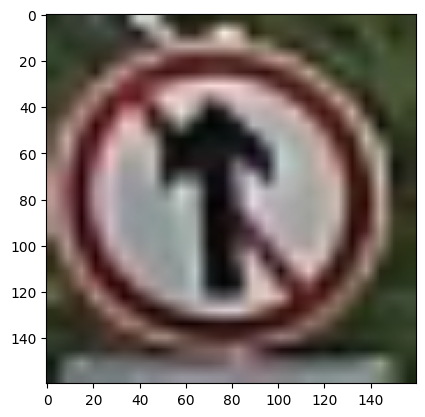

In [8]:
# Visualize some images from the dataset 
img = cv2.imread("C:/Users/hp/Desktop/Project/DATA/10/010_0001_j.png") 
plt.imshow(img) 


In [9]:
labelfile.head()



,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [10]:
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2, 
															  subset='training', 
															  image_size=(224, 224), 
															  seed=123, 
															  batch_size=32) 

val_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2, 
															subset='validation', 
															image_size=(224, 224), 
															seed=123, 
															batch_size=32)


Found 5683 files belonging to 52 classes.
Using 4547 files for training.
Found 5683 files belonging to 52 classes.
Using 1136 files for validation.


In [11]:
class_numbers = train_ds.class_names 
class_names = [] 
for i in class_numbers: 
	class_names.append(labelfile['Name'][int(i)]) 


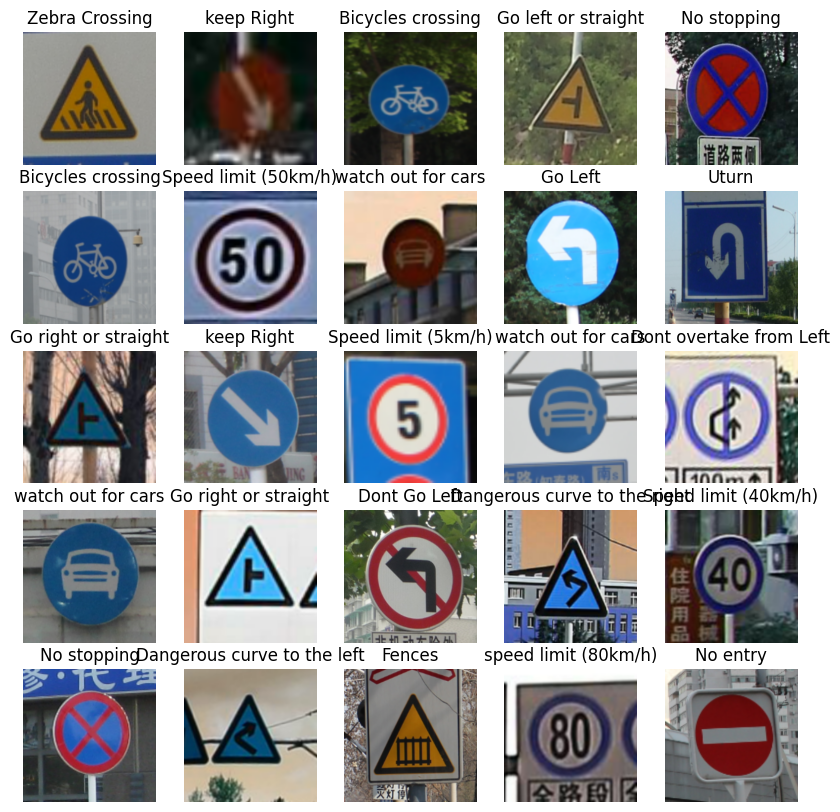

In [12]:
plt.figure(figsize=(10, 10)) 
for images, labels in train_ds.take(1): 
	for i in range(25): 
		ax = plt.subplot(5, 5, i + 1) 
		plt.imshow(images[i].numpy().astype("uint8")) 
		plt.title(class_names[labels[i]]) 
		plt.axis("off") 

plt.show() 


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255
)

# Build your model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(labelfile), activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
model.summary() 



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       2,359,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 52)                  │           6,708 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,820,788 (10.76 MB)

 Trainable params: 2,820,788 (10.76 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
			optimizer='adam', 
			metrics=['accuracy']) 


In [16]:
# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)] 
history = model.fit(train_ds, 
				validation_data=val_ds, 
				epochs=20, 
				callbacks=mycallbacks) 


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.0572 - loss: 6.3993 - val_accuracy: 0.2148 - val_loss: 3.0086
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.1781 - loss: 2.9719 - val_accuracy: 0.3248 - val_loss: 2.4543
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.2644 - loss: 2.6050 - val_accuracy: 0.3829 - val_loss: 2.2483
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.2897 - loss: 2.4940 - val_accuracy: 0.4516 - val_loss: 2.0125
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.3360 - loss: 2.3421 - val_accuracy: 0.4454 - val_loss: 1.9467
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.3312 - loss: 2.3079 - val_accuracy: 0.4102 - val_loss: 1.9048
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.3475 - loss: 2.2350 - val_accuracy: 0.5229 - val_loss: 1.7587
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.4112 - loss: 2.0476 - val_accu

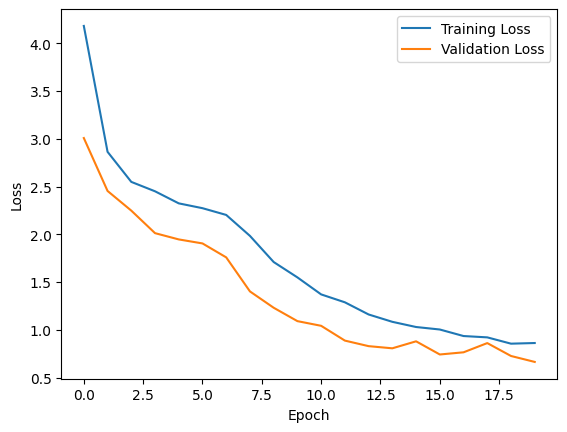

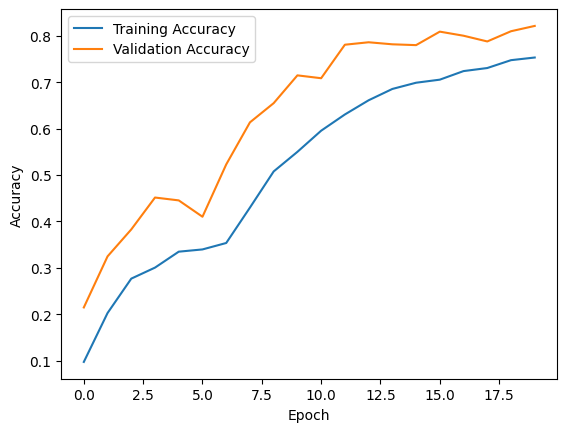

Final training accuracy: 0.7532439231872559
Final validation accuracy: 0.8213028311729431


In [17]:
# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print Final Accuracy
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final validation accuracy:", history.history['val_accuracy'][-1])


In [21]:
model.save('my_model1.keras')
